In [0]:
## Connecting to the Drive

In [2]:

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
## Importing Libraries

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2
from scipy.misc import imresize
from scipy.misc import imread
from keras.preprocessing import image


Using TensorFlow backend.


In [0]:
## Getting images from drive

In [45]:
images001 = glob(os.path.join("drive/app/images_001/images/", "*.png"))
print(len(images001))

3484


In [0]:
## Viewing image

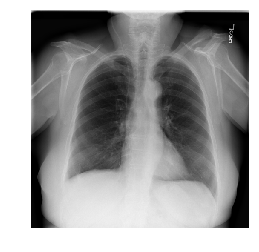

In [47]:
%matplotlib inline
image_name = "drive/app/images_001/images/00000586_000.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

In [0]:
## Reading labels corresponding to images

In [49]:
labels = pd.read_csv('drive/app/Data_Entry_2017.csv')
labels.tail(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
112115,00030801_001.png,Mass|Pneumonia,1,30801,039Y,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,029Y,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,042Y,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,030Y,F,PA,2048,2500,0.168,0.168
112119,00030805_000.png,No Finding,0,30805,027Y,M,PA,2048,2500,0.171,0.171


In [0]:
## Preprocessing Images

In [0]:
def proc_images(folder):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding"
    Consolidation="Consolidation"
    Infiltration="Infiltration"
    Pneumothorax="Pneumothorax"
    Edema="Edema"
    Emphysema="Emphysema"
    Fibrosis="Fibrosis"
    Effusion="Effusion"
    Pneumonia="Pneumonia"
    Pleural_Thickening="Pleural_Thickening"
    Cardiomegaly="Cardiomegaly"
    NoduleMass="Nodule"
    Hernia="Hernia"
    Atelectasis="Atelectasis"
    RareClass=["Emphysema","Edema","Fibrosis","Pneumonia","Hernia"]
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 64
    HEIGHT = 64

    for img in folder:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if NoFinding in finding:
            finding = 0
            y.append(finding)        
        elif Consolidation in finding:
            finding = 1
            y.append(finding)    
        elif Infiltration in finding:
            finding = 2
            y.append(finding)           
        elif Pneumothorax in finding:
            finding = 3
            y.append(finding)
        elif Edema in finding:
            finding = 9##
            y.append(finding)
        elif Emphysema in finding:
            finding = 9##
            y.append(finding)
        elif Fibrosis in finding:
            finding = 9##
            y.append(finding) 
        elif Effusion in finding:
            finding = 4
            y.append(finding)             
        elif Pneumonia in finding:
            finding = 9##
            y.append(finding)   
        elif Pleural_Thickening in finding:
            finding = 5
            y.append(finding) 
        elif Cardiomegaly in finding:
            finding = 6
            y.append(finding) 
        elif NoduleMass in finding:
            finding = 7
            y.append(finding) 
        elif Hernia in finding:
            finding = 9##
            y.append(finding) 
        elif Atelectasis in finding:
            finding = 8
            y.append(finding) 
        else:
            finding = 9
            y.append(finding)

    return x,y


In [52]:
X001,y001 = proc_images(images001[:500])
df001 = pd.DataFrame()
df001["images"]=X001
df001["labels"]=y001
print(len(df001), df001.images[0].shape)

500 (64, 64, 3)


In [0]:
## Converting to arrays

In [0]:
len(df001["labels"])
df001['images'][0]
df001['images']=np.array(df001['images'])
df001['labels']=np.array(df001['labels'])

In [0]:
## Converting train images to array and applying mean subtraction processing


In [0]:
X001,y001 = proc_images(images001[2000:2100])
te001 = pd.DataFrame()
te001["images"]=X001
te001["labels"]=y001
te001['images']=np.array(te001['images'])
te001['labels']=np.array(te001['labels'])


In [0]:
X_tr=[]
X_train=df001.images
for i in range(len(df001.images)):

    temp_img=X_train[i]

    temp_img=image.img_to_array(temp_img)

    X_tr.append(temp_img)


X_tr=np.array(X_tr)


In [0]:
## Applying the same procedure with the test dataset

In [0]:
X_te=[]
X_test=te001.images
for i in range(len(te001.images)):

    temp_img=X_test[i]

    temp_img=image.img_to_array(temp_img)

    X_te.append(temp_img)

X_te=np.array(X_te)

In [59]:
print(X_tr.shape,X_te.shape)

(500, 64, 64, 3) (100, 64, 64, 3)


In [0]:
## Reshaping to apply machine learning algorithms

In [61]:
X_tr=X_tr.reshape((X_tr.shape[0],X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
X_te=X_te.reshape((X_te.shape[0],X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))
print(X_tr.shape,X_te.shape)


(500, 12288) (100, 12288)


In [0]:
def frange(start, stop, step):
     i = start
     while i < stop:
         yield i
         i += step

In [0]:
## Applying SVC

In [64]:
from sklearn import svm, grid_search, datasets

parameters = {'kernel':('linear', 'rbf','poly'), 'C':list(frange(1,2,0.1))}
svr =svm. SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(X_tr,df001['labels'])
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [65]:
from sklearn.svm import SVC
from sklearn import metrics
clf = SVC(kernel='rbf',C=1)
clf.fit(X_tr,df001['labels'])
pred=clf.predict(X_te)
print("Accuracy",metrics.accuracy_score(pred,te001['labels']))

Accuracy 0.62


In [0]:
## Applying Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
accuracy=[];
for i in range(40):
    clf = RandomForestClassifier(max_depth=i+1, random_state=0)
    clf.fit(X_tr, df001['labels'])
    pred=clf.predict(X_te)
    accuracy.append(metrics.accuracy_score(pred,te001['labels']))
    #print("Accuracy",accuracy[i])

In [0]:
## Plotting Graph

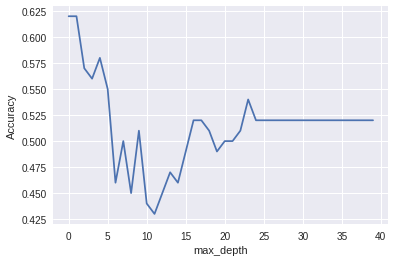

In [69]:
import matplotlib.pyplot as plt
costs = np.squeeze(accuracy)
plt.plot(costs)
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.show()


In [0]:
from sklearn.ensemble import RandomForestClassifier
est=[];
for i in range(40):
    clf = RandomForestClassifier(n_estimators=i+1,max_depth=2, random_state=0)
    clf.fit(X_tr, df001['labels'])
    pred=clf.predict(X_te)
    est.append(metrics.accuracy_score(pred,te001['labels']))


In [0]:
## Plotting Graph

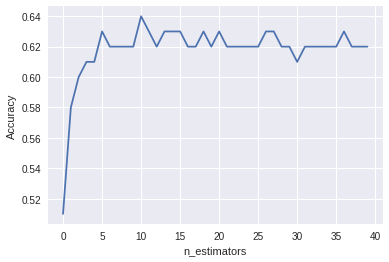

In [72]:
costs = np.squeeze(est)
plt.plot(costs)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [0]:
## Applying Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt=[]
for  i in range(40):
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=i+2)
    clf.fit(X_tr, df001['labels'])
    pred=clf.predict(X_te)
    dt.append(metrics.accuracy_score(pred,te001['labels']))
    #print("Accuracy: ",metrics.accuracy_score(pred,te001['labels']))

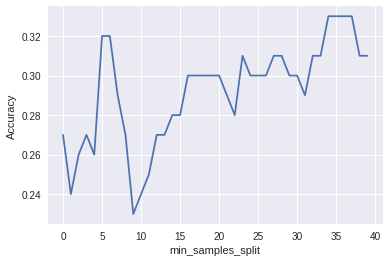

In [75]:
costs = np.squeeze(dt)
plt.plot(costs)
plt.ylabel('Accuracy')
plt.xlabel('min_samples_split')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [0]:
## Applying K-Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=[]
for i in range(100):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_tr, df001['labels']) 
    pred=neigh.predict(X_te)
    p=metrics.accuracy_score(pred,te001['labels'])
    knn.append(p)
    #print("Accuracy: ",p)

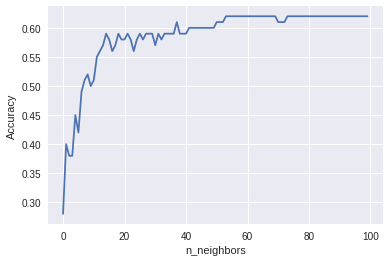

In [78]:
costs = np.squeeze(knn)
plt.plot(costs)
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()